In [1]:
from time import time
import math as mt

from matplotlib import pyplot as plt
import numpy as np

In [2]:
## 소수 판별해주는 함수
def is_prime(p):

    if p == 1: return False
        
    for idx in range(2, int(mt.sqrt(p)) + 1):

        if p % idx == 0: return False

    return True


## 소인수 구해주는 함수
def get_prime_factors(n):

    prime_factors = []
    for idx in range(1, int(mt.sqrt(n)) + 1):

        q, r = divmod(n, idx)
        if r ==0:

            if is_prime(idx): prime_factors.append(idx)

            ## idx를 제곱해서 n이 되는 경우, 이미 prime_factors에
            ## 들어가 있기 때문에 추가하지 않음.
            if ((idx ** 2) != n):
                if is_prime(q): prime_factors.append(q)

    return sorted(prime_factors)


def euler_pi_function(n):

    prime_factors = get_prime_factors(n)
    for factor in prime_factors:
        
        n *= (1 - 1/factor)

    return n


def get_relatively_primes(n):

    cnt = 0
    for idx in range(1, n + 1):

        if mt.gcd(idx, n) == 1: cnt += 1

    return cnt

In [3]:
print(f"Euler's pi function :     {euler_pi_function(23571113)}")
print(f"count one by one    : {get_relatively_primes(23571113)}")

Euler's pi function :     21768208.0
count one by one    : 21768208


In [4]:
%%timeit
euler_pi_function(23571113)

1.54 ms ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%%timeit
get_relatively_primes(23571113)

14.6 s ± 499 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
interval = np.arange(10, 1000000, 100)
times    = []
append   = times.append

for int_ in interval:
    start    = time()
    euler_pi_function(int_)
    append(time() - start)

In [7]:
times2   = []
append   = times2.append

for int_ in interval:

    start   = time()
    get_relatively_primes(int_)
    append(time() - start)

Text(0, 0.5, 'time (sec)')

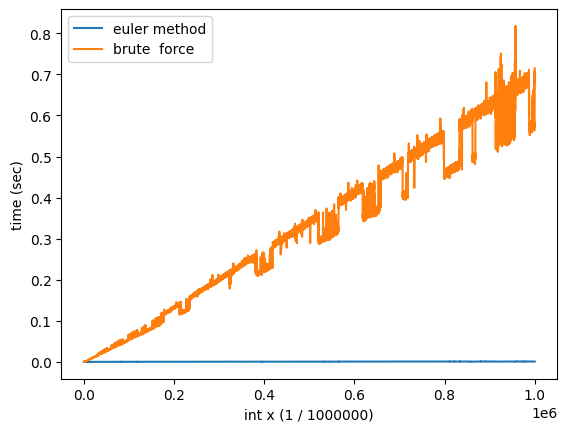

In [8]:
plt.plot(interval, times , label = "euler method")
plt.plot(interval, times2, label = "brute  force")
plt.legend(loc = 'best')
plt.xlabel('int x (1 / 1000000)')
plt.ylabel('time (sec)')